<h1> Modelos Computacionales I.
<h2> Unidad de probabilidad y estadística. 
<h3> Práctica 2: Ejercicio 1b) y 1d) con tasa de disparo optimizada.
<h3> Carolina Bernal Rodríguez.

In [1]:
#-- Tasa de disparo optimizada -- 
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import Caro_lectura_archivo as lectArchivo

In [2]:
#Ajustes para la estética de las gráficas 
plt.rcParams['savefig.bbox'] = "tight"
style.use('seaborn-whitegrid') or plt.style.use('seaborn-whitegrid')

In [3]:
#Ajustes para la estética de las gráficas
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [4]:
vacios,neu_dpc1 = lectArchivo.lectura_archivo('Practica1_Estadistica/TiemposNeuDPC1.csv')

In [5]:
# Función que obtiene los nuevos índices modificados a partir de la lectura del archivo y la eliminación de las filas vacías.
# Con estos ubicamos en qué índice comienza y termina una clase. 
def indices_reales(vacios):
    indices_final = []
    for i in range(len(vacios)):
        indices_corregidos = np.array(vacios)[i] - vacios.index(vacios[i])
        indices_final.append(indices_corregidos)
    return np.array(indices_final)

In [6]:
bloq1 = indices_reales(vacios)[0]

In [7]:
len(np.array(neu_dpc1[:bloq1]))

<ipython-input-7-e2dee02b77eb>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  len(np.array(neu_dpc1[:bloq1]))


15

In [8]:
type(neu_dpc1[:bloq1])

list

Es necesario buscar una forma más eficiente de calcular la tasa de disparo. 

In [9]:
array_ensayos = np.array(neu_dpc1[0:15])  #Array de arrays que contiene los ensayos realizados de una clase 
num_ensayos   = len(array_ensayos) # Número de ensayos
num_vetanas   = len(np.arange(-2+0.05,8+0.01,0.01)) #Consideramos los extremos de cada ventana 
array_conteos = np.zeros((num_ensayos, num_vetanas)) #Matriz que almacena los conteos (ensayos x #ventanas)

razon = (array_ensayos + 2) // 0.01 #División entera, de los ensayos (iniciando en cero) entre el tamaño del paso  

for i in range (num_ensayos): 
    concatena = razon[i] #Calcular todas las ventanas en donde cae la espiga
   
    for j in range (1,5):  #Recorreos el arreglo 
        conteo = razon[i]- j
        
        
        concatena = np.append(concatena[concatena>=0],conteo[conteo>=0]) #Posibilidades positivas de ocurrencia  
        #np.concatenate((concatena,conteo[conteo>=0]))
   
    unicos = np.unique(concatena,return_counts=True) #total de espigas x ventana , valores únicos 
    indices = unicos[0].astype(int) #unicos[0] contiene los valores posibles en concatena, los utilizamos como índices 
    array_conteos[i][indices] = unicos[1][np.arange(0,len(unicos[0]))]    #unicos[1]: cuántas veces ocurre cada valor 
    
tiempo = np.arange(-2+0.05,8+0.01,0.01) 
tasa_disparo = array_conteos/0.05  # Tasa de disparo
tasa_disparo_promedio = np.mean(tasa_disparo,0)  #Tasa de disparo promedio de los ensayos


<ipython-input-9-0b5652f19ee4>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  array_ensayos = np.array(neu_dpc1[0:15])  #Array de arrays que contiene los ensayos realizados de una clase


In [10]:
tasa_disparo

array([[60., 40., 40., ...,  0.,  0.,  0.],
       [40., 40., 40., ...,  0.,  0.,  0.],
       [20., 20., 40., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0., 20., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 40., 60., ...,  0.,  0.,  0.]])

Text(0, 0.5, 'Tasa de disparo [Hz]')

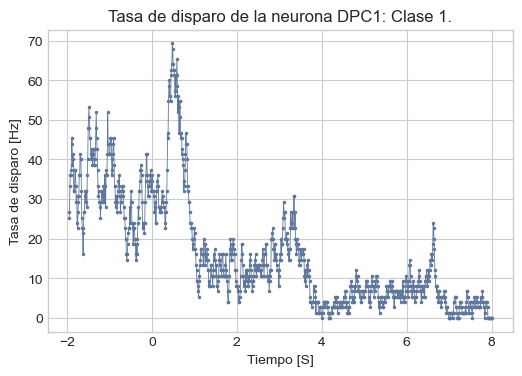

In [11]:
fig = plt.figure(dpi=100)
plt.plot(tiempo,tasa_disparo_promedio,'o-',ms=1.5,linewidth=0.6)
plt.title("Tasa de disparo de la neurona DPC1: Clase 1.")
plt.xlabel("Tiempo [S]")
plt.ylabel("Tasa de disparo [Hz]")

In [12]:
def tasa_disparo_optimizada(datos, inicio, fin, ventana, paso):
    
    array_ensayos = np.array(datos)  #Array de arrays que contiene los ensayos realizados de una clase 
    num_ensayos   = len(array_ensayos)
    num_vetanas   = len(np.arange( inicio , fin , paso ))
    array_conteos = np.zeros((num_ensayos, num_vetanas)) #Matriz que almacena los conteos (ensayos x #ventanas)

    razon = (array_ensayos + np.abs(inicio)) // paso #Ensayos (iniciando en cero) entre el tamaño del paso  

    for i in range (num_ensayos): 
        concatena = razon[i] #Calcular todas las ventanas en donde cae la espiga

        for j in range (1,5):
            conteo = razon[i]- j  #Recorrer las ventanas en donde cae la espiga 


            concatena = np.append(concatena[concatena>=0],conteo[conteo>=0]) #Posibilidades positivas de ocurrencia  
            #np.concatenate((concatena,conteo[conteo>=0]))  # Se agrupan los conteos positivos 

        unicos = np.unique(concatena,return_counts=True) #total de espigas x ventana , valores únicos 
        indices = unicos[0].astype(int) #unicos[0] :los valores posibles en concatena, los utilizamos como índices 
        array_conteos[i][indices] = unicos[1][np.arange(0,len(unicos[0]))]   #unicos[1]: cuántas veces ocurre cada valor 

    tiempo = np.arange(inicio + ventana, fin + paso, paso) 
    tasa_disparo = array_conteos / ventana # Tasa de disparo de cada ensayo por separado 
    tasa_disparo_promedio = np.mean(tasa_disparo,0)  #Tasa de disparo promedio de los ensayos
    
    return tasa_disparo, tasa_disparo_promedio

In [13]:
num_vetanas =  len(np.arange(-2+0.05,8+0.01,0.01))
bloque1_DPC1 = np.array(neu_dpc1[:15])
eventos_final = np.zeros((15,num_vetanas )) 


P =(bloque1_DPC1 + 2)//0.01 # Empezar en 0 El punto de inicio es el extremo 2, división entera entre el tamaño de paso

for i in range (0,15): #La cantidad de ensayos que hay en la clase 
    
    conteo = [P[i]-j for j in range(0,5)]  # Recorrer el arreglo, para contar en dónde cae la espiga 
    agrupada = np.concatenate((conteo[::-1])) #Agrupamos los conteos de forma inversa
    agrupada = agrupada[agrupada>=0]  # Filtramos los positivos 
    Unica_cad = np.unique(agrupada,return_counts=True) # Los valores únicos, regresando las cuentas 
    long = len(Unica_cad[0]) # Contamos los valores obtenidos (del conteo)
    longitud = long - 1
    
    vec = np.arange(0,long) # Creamos un vector de longitud 
    val = Unica_cad[0].astype(int)
    eventos_final[i][val] = Unica_cad[1][vec]
   
        
Tasa_eventos = eventos_final /0.05   # Tasa de disparo de cada ensayo en variables individuales 
Tasa_disparo_b1_DPC1 = np.mean(Tasa_eventos,0) #Calculamos el promedio de los ensayos para obtener la tasa de disparo  

<ipython-input-13-4509366eb181>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque1_DPC1 = np.array(neu_dpc1[:15])


In [14]:
print(Tasa_eventos)
Tasa_disparo_b1_DPC1

[[60. 40. 40. ...  0.  0.  0.]
 [40. 40. 40. ...  0.  0.  0.]
 [20. 20. 40. ...  0.  0.  0.]
 ...
 [ 0.  0. 20. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 40. 60. ...  0.  0.  0.]]


array([25.33333333, 26.66666667, 33.33333333, 36.        , 36.        ,
       37.33333333, 44.        , 45.33333333, 38.66666667, 40.        ,
       41.33333333, 32.        , 32.        , 33.33333333, 37.33333333,
       37.33333333, 33.33333333, 29.33333333, 30.66666667, 24.        ,
       22.66666667, 26.66666667, 29.33333333, 30.66666667, 36.        ,
       36.        , 41.33333333, 40.        , 40.        , 32.        ,
       25.33333333, 22.66666667, 21.33333333, 16.        , 22.66666667,
       26.66666667, 26.66666667, 30.66666667, 32.        , 29.33333333,
       32.        , 32.        , 28.        , 36.        , 40.        ,
       48.        , 50.66666667, 53.33333333, 48.        , 45.33333333,
       45.33333333, 41.33333333, 40.        , 40.        , 42.66666667,
       38.66666667, 41.33333333, 41.33333333, 42.66666667, 38.66666667,
       38.66666667, 40.        , 42.66666667, 48.        , 52.        ,
       45.33333333, 42.66666667, 37.33333333, 33.33333333, 30.66

In [15]:
def tasa_optimizada(inicio,fin,paso,ventana,bloque,ensayos,num_bloques):
    
    num_vetanas =  len(np.arange(inicio + ventana , fin + paso, paso))
    eventos_f = np.zeros((ensayos,num_vetanas+4)) 


    P =(bloque + np.abs(inicio))//paso 

    for i in range (0,ensayos):

        conteo = [P[i]-j for j in range(0,num_bloques+1)]
        agrupada = np.concatenate((conteo[::-1]))
        agrupada = agrupada[agrupada>=0] 
       
        Unica_cad = np.unique(agrupada,return_counts=True)
        long = len(Unica_cad[0])
        longitud = long - 1

        vec = np.arange(0,long)
        val = Unica_cad[0].astype(int)
        eventos_f[i][val] = Unica_cad[1][vec]
        
        #for j in range (0,longitud):
        #
        #    index = int(Unica_cad[0][j])
        #    value = Unica_cad[1][j]
        #    eventos_f[i][index] = value

        
    tasa_eventos = eventos_f/ventana
    tasa_disparo = np.mean(tasa_eventos,0)
    
    return tasa_eventos, tasa_disparo

<h2> Práctica 2 : Ejercicio 1. </h2>


1. Transformada z (z-scores), y vamos a usar los siguientes archivos: de la tarea de discriminación de patrones ```TiemposNeuDPC1.csv```, ```TiemposNeuDPC2.csv``` y ```TiemposNeuS1.csv```; de la tarea de detección ```DetNeuS1_B``` y ```NeuDetS1_D```. Antes de empezar, calcule las tasas de disparo de las cinco neuronas: para las tres neuronas de S1 emplee ventanas de 50ms y pasos de 10 ms; para las dos de DPC, ventanas de 200ms y pasos de 40ms. Vamos a calcular la evolución temporal para diferentes z-scores promedio por clase y neurona. Para todos los incisos, grafique cada una de sus curvas con una barra de error que indique ± una desviación estándar del correspondiente z-score.

In [16]:
vacios,neu_dpc1 = lectArchivo.lectura_archivo('Practica1_Estadistica/TiemposNeuDPC1.csv')
bloq1 = indices_reales(vacios)[0]
ensayos = len(np.array(neu_dpc1[:bloq1]))

<ipython-input-16-efc109219d36>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ensayos = len(np.array(neu_dpc1[:bloq1]))


In [17]:
bloque1_DPC1 = np.array(neu_dpc1[:15])

<ipython-input-17-46de72a671d3>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque1_DPC1 = np.array(neu_dpc1[:15])


In [18]:
#num_ventanas = len(np.arange(-2 + 0.05 , 8 + 0.01, 0.01))
#tasa_eventos_1_dpc1, tasa_disparo_1_dpc1 = tasa_optimizada(-2,8,0.01,0.05,bloque1_DPC1,ensayos,4)
#len(np.arange(-2 + 0.05, 8 + 0.01 , 0.01) )
#ventanas = len(np.arange(-2 + 0.2, 8 + 0.04 , 0.04))

In [19]:
tasa_eventos_1_dpc1, tasa_disparo_1_dpc1 = tasa_optimizada(-2,8,0.04,0.2,bloque1_DPC1,ensayos,4)

In [20]:
tasa_eventos_1_dpc1

array([[45., 50., 45., ...,  0.,  0.,  0.],
       [40., 30., 45., ...,  0.,  0.,  0.],
       [25., 20., 15., ...,  0.,  0.,  0.],
       ...,
       [20., 20., 25., ...,  0.,  0.,  0.],
       [ 5.,  5., 10., ...,  0.,  0.,  0.],
       [60., 70., 60., ...,  0.,  0.,  0.]])

In [21]:
bloque2_DPC1 = np.array(neu_dpc1[15:30])
tasa_eventos_2_dpc1, tasa_disparo_2_dpc1 = tasa_optimizada(-2,8,0.04,0.2,bloque2_DPC1,ensayos,4)

<ipython-input-21-74d5ae5d75f0>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque2_DPC1 = np.array(neu_dpc1[15:30])


In [22]:
bloque3_DPC1 = np.array(neu_dpc1[30:45])
tasa_eventos_3_dpc1, tasa_disparo_3_dpc1 = tasa_optimizada(-2,8,0.04,0.2,bloque3_DPC1,ensayos,4)

<ipython-input-22-9d39fbd885c1>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque3_DPC1 = np.array(neu_dpc1[30:45])


In [23]:
bloque4_DPC1 = np.array(neu_dpc1[45:60])
tasa_eventos_4_dpc1, tasa_disparo_4_dpc1 = tasa_optimizada(-2,8,0.04,0.2,bloque4_DPC1,ensayos,4)

<ipython-input-23-995e6af510bf>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque4_DPC1 = np.array(neu_dpc1[45:60])


In [24]:
#Función Z-score de un conjunto de datos 
def Z_score(data,mean_data,std_data):
    return (data - mean_data) / std_data

In [25]:
def graficas_zscore_dpc_todas_ventanas(TotalEventos_dpc,ancho_vent,paso_tiempo,neurona,colores_zs,nombre_graf):

        #TotalEventos_dpc = fun(lista_de_clase,ancho_vent)
        clase_1 =  TotalEventos_dpc[0:15]
        clase_2 =  TotalEventos_dpc[15:30]
        clase_3 =  TotalEventos_dpc[30:45]
        clase_4 =  TotalEventos_dpc[45:60]
    
        mean_data = np.mean(TotalEventos_dpc) #µ
        std_data  = np.std(TotalEventos_dpc) #σ 
        
        Z_clase1 = Z_score(clase_1,mean_data,std_data)
        Z_clase2 = Z_score(clase_2,mean_data,std_data)
        Z_clase3 = Z_score(clase_3,mean_data,std_data)
        Z_clase4 = Z_score(clase_4,mean_data,std_data)
    
        ZProm_clase1 = np.mean(Z_clase1,axis=0) 
        Z_mas_1 = ZProm_clase1 + np.std(ZProm_clase1)
        Z_menos_1 = ZProm_clase1 - np.std(ZProm_clase1)
        
        ZProm_clase2 = np.mean(Z_clase2,axis=0) 
        Z_mas_2 = ZProm_clase2 + np.std(ZProm_clase2)
        Z_menos_2 = ZProm_clase2 - np.std(ZProm_clase2)
        
        ZProm_clase3 = np.mean(Z_clase3,axis=0) 
        Z_mas_3 = ZProm_clase3 + np.std(ZProm_clase3)
        Z_menos_3 = ZProm_clase3 - np.std(ZProm_clase3)
        
        ZProm_clase4 = np.mean(Z_clase4,axis=0) 
        Z_mas_4 = ZProm_clase4 + np.std(ZProm_clase4)
        Z_menos_4 = ZProm_clase4 - np.std(ZProm_clase4)
        
        fig=plt.figure(figsize=(19,11)) #ancho,largo
        fig.suptitle(f"Z-score de la {neurona[0]} en {neurona[1]} de discriminación de patrones con una ventana de {ancho_vent}s y pasos de {paso_tiempo}s.",fontsize=20)
        axs=fig.subplots(2,2)
        tiempos_dpc = np.arange(-2 + ancho_vent ,8 + paso_tiempo ,paso_tiempo)
        
        axs[0,0].plot(tiempos_dpc,ZProm_clase1,linewidth=3,color=colores_zs[0])
        axs[0,0].fill_between(tiempos_dpc,Z_mas_1,Z_menos_1,color=colores_zs[0],alpha=0.4,label = 'z_score ± σ')
        axs[0,0].set_title("Clase 1",fontsize=15,fontweight="bold")
        axs[0,0].set_xlabel("Tiempo [s]",fontsize=13)
        axs[0,0].set_ylabel("Z-Score",fontsize=13)
        axs[0,0].legend(fontsize=12)
        
        axs[0,1].plot(tiempos_dpc,ZProm_clase2,linewidth=3,color=colores_zs[1])
        axs[0,1].fill_between(tiempos_dpc,Z_mas_2,Z_menos_2,color=colores_zs[1],alpha=0.4,label = 'z_score ± σ')
        axs[0,1].set_title("Clase 2",fontsize=15,fontweight="bold")
        axs[0,1].set_xlabel("Tiempo [s]",fontsize=13)
        axs[0,1].set_ylabel("Z-Score",fontsize=13)
        axs[0,1].legend(fontsize=12)
        
        axs[1,0].plot(tiempos_dpc,ZProm_clase3,linewidth=3,color=colores_zs[2])
        axs[1,0].fill_between(tiempos_dpc,Z_mas_3,Z_menos_3,color=colores_zs[2],alpha=0.4,label = 'z_score ± σ')
        axs[1,0].set_title("Clase 3",fontsize=15,fontweight="bold")
        axs[1,0].set_xlabel("Tiempo [s]",fontsize=13)
        axs[1,0].set_ylabel("Z-Score",fontsize=13)
        axs[1,0].legend(fontsize=12)
        
        axs[1,1].plot(tiempos_dpc,ZProm_clase4,linewidth=3,color=colores_zs[3])
        axs[1,1].fill_between(tiempos_dpc,Z_mas_4,Z_menos_4,color=colores_zs[3],alpha=0.4,label = 'z_score ± σ')
        axs[1,1].set_title("Clase 4",fontsize=15,fontweight="bold")
        axs[1,1].set_xlabel("Tiempo [s]",fontsize=13)
        axs[1,1].set_ylabel("Z-Score",fontsize=13)
        axs[1,1].legend(fontsize=12)
    
        plt.savefig(nombre_graf)
        plt.show()

In [26]:
TotalEventos_dpc=np.vstack([tasa_eventos_1_dpc1,tasa_eventos_2_dpc1,tasa_eventos_3_dpc1,tasa_eventos_4_dpc1])

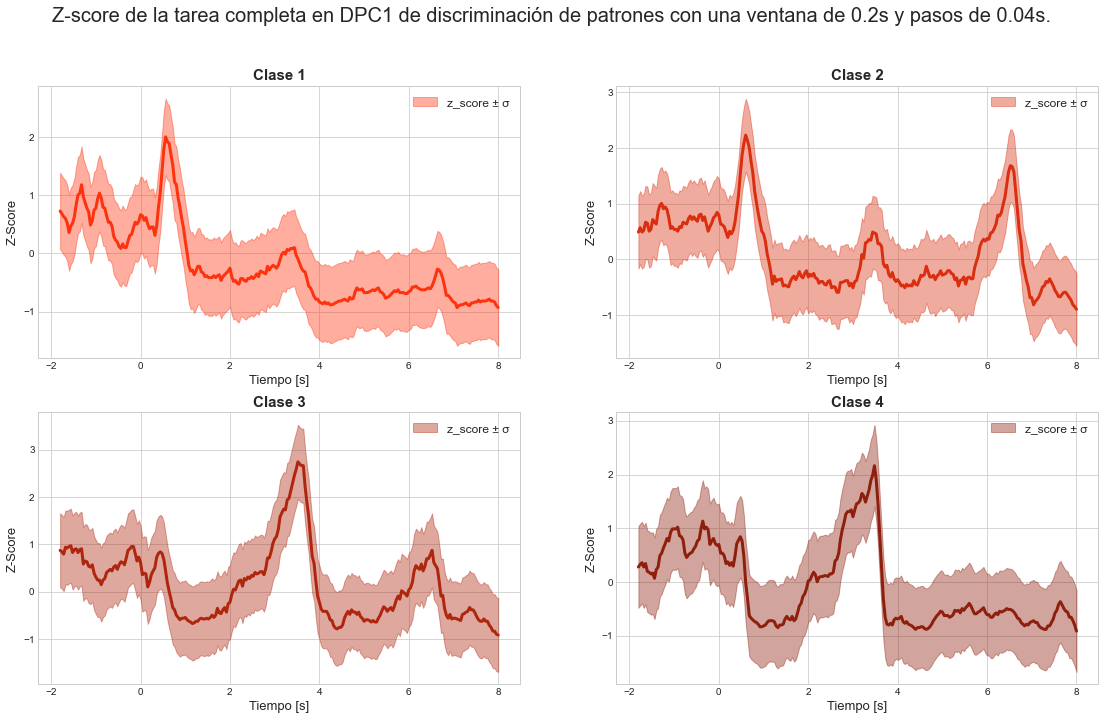

In [27]:
TotalEventos_dpc = TotalEventos_dpc[:,0:246]
neurona = ['tarea completa', 'DPC1']
colores_zs = ["#fd320e","#da2e10","#af260e","#8d1f0c"]
nombre_graf = 'z_score_completa_dpc1'
ancho_vent = 0.2
paso_tiempo = 0.04
graficas_zscore_dpc_todas_ventanas(TotalEventos_dpc,ancho_vent,paso_tiempo,neurona,colores_zs,nombre_graf)

In [28]:
tasa_disparo_dpc_1, tasa_disparo_promedio_dpc_1 = tasa_disparo_optimizada(bloque1_DPC1, -2, 8, 0.05, 0.01)

In [29]:
tasa_disparo_dpc_1, tasa_disparo_promedio_dpc_1 = tasa_disparo_optimizada(bloque1_DPC1, -2, 8, 0.2, 0.04)

In [30]:
#tasa_disparo_dpc_1[:,0:45]

(c) Obten y gráfica el z-score (para cada neurona y clase) usando la tasa de cada ventana
de tiempo particular y todos los ensayos para calcular el valor medio y la desviación
estándar con las que se computa la transformada z en cada tiempo y clase. Esto
es, para computar el z-score en el tiempo t va a usar la media y desviación de la
tasa en el tiempo t (una sola ventana). Además grafique la tasa transformada de
algunos ensayos de cada una de las condiciones como ejemplos.

In [31]:
def graficas_zscore_variado(TotalEventos_dpc,num,ancho_vent,paso_tiempo,neurona,ejemplo,colores_zs,nombre_graf):

        #TotalEventos_dpc = fun(lista_de_clase,ancho_vent)
        clase_1 =  TotalEventos_dpc[0:15]
        clase_2 =  TotalEventos_dpc[15:30]
        clase_3 =  TotalEventos_dpc[30:45]
        clase_4 =  TotalEventos_dpc[45:60]
        
        
        mean_data = np.mean(TotalEventos_dpc,axis=0) #µ
        std_data  = np.std(TotalEventos_dpc,axis=0) #std
        
      
        Z_clase1 = Z_score(clase_1,mean_data,std_data)
        Z_clase2 = Z_score(clase_2,mean_data,std_data)
        Z_clase3 = Z_score(clase_3,mean_data,std_data)
        Z_clase4 = Z_score(clase_4,mean_data,std_data)
        
        if num !=0 :
            faltantes = (np.zeros((15,num),dtype=float))
            Z_clase1  = np.hstack((Z_clase1,faltantes))
            Z_clase2  = np.hstack((Z_clase2,faltantes))
            Z_clase3  = np.hstack((Z_clase3,faltantes))
            Z_clase4  = np.hstack((Z_clase4,faltantes))
       
    
        ZProm_clase1 = np.mean(Z_clase1,axis=0) 
        Z_mas_1 = ZProm_clase1 + np.std(ZProm_clase1)
        Z_menos_1 = ZProm_clase1 - np.std(ZProm_clase1)
        
        ZProm_clase2 = np.mean(Z_clase2,axis=0) 
        Z_mas_2 = ZProm_clase2 + np.std(ZProm_clase2)
        Z_menos_2 = ZProm_clase2 - np.std(ZProm_clase2)
        
        ZProm_clase3 = np.mean(Z_clase3,axis=0) 
        Z_mas_3 = ZProm_clase3 + np.std(ZProm_clase3)
        Z_menos_3 = ZProm_clase3 - np.std(ZProm_clase3)
        
        ZProm_clase4 = np.mean(Z_clase4,axis=0) 
        Z_mas_4 = ZProm_clase4 + np.std(ZProm_clase4)
        Z_menos_4 = ZProm_clase4 - np.std(ZProm_clase4)
        
        fig=plt.figure(figsize=(21,11)) #ancho,largo
        fig.suptitle(f"Z-score de la {neurona[0]} en {neurona[1]} de discriminación de patrones con una ventana de {ancho_vent}s y pasos de {paso_tiempo}s.",fontsize=20,fontweight="bold")
        axs=fig.subplots(2,2)
        tiempos_dpc = np.arange(-2 + ancho_vent,8 + paso_tiempo ,paso_tiempo)
        
        axs[0,0].plot(tiempos_dpc,Z_clase1[ejemplo[0],:],linewidth=1.5,color="#495057",alpha=1)
        axs[0,0].plot(tiempos_dpc,ZProm_clase1,linewidth=3,color=colores_zs[0])
        axs[0,0].fill_between(tiempos_dpc,Z_mas_1,Z_menos_1,color=colores_zs[0],alpha=0.4)
        axs[0,0].set_title("Clase 1",fontsize=15,fontweight="bold")
        axs[0,0].set_xlabel("Tiempo [s]",fontsize=13)
        axs[0,0].set_ylabel("Z-Score",fontsize=13)
        axs[0,0].legend([f'Ensayo {ejemplo[0]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[0,1].plot(tiempos_dpc,Z_clase2[ejemplo[1],:],linewidth=1.5,color="#495057",alpha=1)
        axs[0,1].plot(tiempos_dpc,ZProm_clase2,linewidth=3,color=colores_zs[1])
        axs[0,1].fill_between(tiempos_dpc,Z_mas_2,Z_menos_2,color=colores_zs[1],alpha=0.4)
        axs[0,1].set_title("Clase 2",fontsize=15,fontweight="bold")
        axs[0,1].set_xlabel("Tiempo [s]",fontsize=13)
        axs[0,1].set_ylabel("Z-Score",fontsize=13)
        axs[0,1].legend([f'Ensayo {ejemplo[1]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[1,0].plot(tiempos_dpc,Z_clase3[ejemplo[2],:],linewidth=1.5,color="#495057",alpha=1)
        axs[1,0].plot(tiempos_dpc,ZProm_clase3,linewidth=3,color=colores_zs[2])
        axs[1,0].fill_between(tiempos_dpc,Z_mas_3,Z_menos_3,color=colores_zs[2],alpha=0.4)
        axs[1,0].set_title("Clase 3",fontsize=15,fontweight="bold")
        axs[1,0].set_xlabel("Tiempo [s]",fontsize=13)
        axs[1,0].set_ylabel("Z-Score",fontsize=13)
        axs[1,0].legend([f'Ensayo {ejemplo[2]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[1,1].plot(tiempos_dpc,Z_clase4[ejemplo[3],:],linewidth=1.5,color="#495057",alpha=1)
        axs[1,1].plot(tiempos_dpc,ZProm_clase4,linewidth=3,color=colores_zs[3])
        axs[1,1].fill_between(tiempos_dpc,Z_mas_4,Z_menos_4,color=colores_zs[3],alpha=0.4)
        axs[1,1].set_title("Clase 4",fontsize=15,fontweight="bold")
        axs[1,1].set_xlabel("Tiempo [s]",fontsize=13)
        axs[1,1].set_ylabel("Z-Score",fontsize=13)
        axs[1,1].legend([f'Ensayo {ejemplo[3]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        plt.savefig(nombre_graf)
        plt.show()

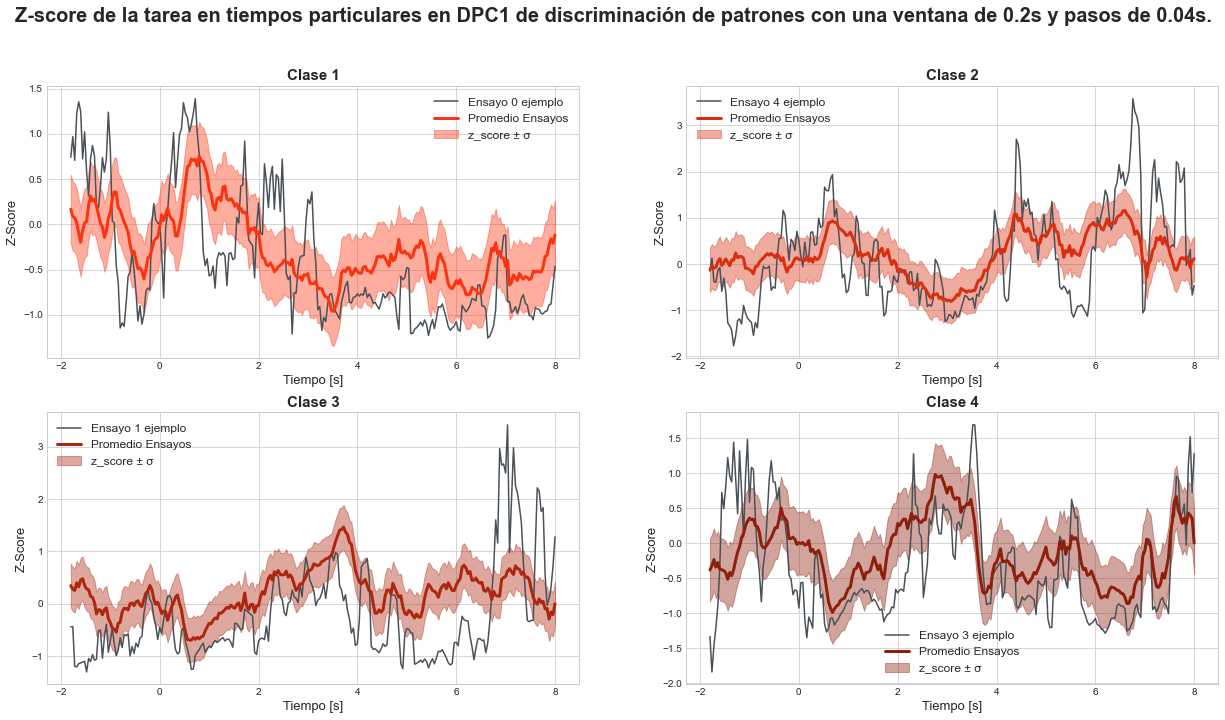

In [32]:
TotalEventos_dpc = TotalEventos_dpc[:,0:246]
num = 0
#tiempos_dpc = np.arange(-2 + 0.2,8 + 0.04 ,0.04)[:246]
neurona = ['tarea en tiempos particulares', 'DPC1']
ejemplo = [0,4,1,3]
colores_zs = ["#fd320e","#da2e10","#af260e","#8d1f0c"]
nombre_graf = 'z_score_particular_dpc1'
ancho_vent = 0.2
paso_tiempo = 0.04
graficas_zscore_variado(TotalEventos_dpc,num,ancho_vent,paso_tiempo,neurona,ejemplo,colores_zs,nombre_graf)

In [33]:
vacios,neu_dpc2 = lectArchivo.lectura_archivo('Practica1_Estadistica/TiemposNeuDPC2.csv')

In [34]:
bloque1_DPC2 = np.array(neu_dpc2[:15])
bloque2_DPC2 = np.array(neu_dpc2[15:30])
bloque3_DPC2 = np.array(neu_dpc2[30:45])
bloque4_DPC2 = np.array(neu_dpc2[45:60])

<ipython-input-34-7f7c7f3dde8a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque1_DPC2 = np.array(neu_dpc2[:15])
<ipython-input-34-7f7c7f3dde8a>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque2_DPC2 = np.array(neu_dpc2[15:30])
<ipython-input-34-7f7c7f3dde8a>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque3_DPC2 =

In [35]:
tasa_eventos_1_dpc2, tasa_disparo_1_dpc2 = tasa_optimizada(-2,8,0.04,0.2,bloque1_DPC2,ensayos,4)
tasa_eventos_2_dpc2, tasa_disparo_2_dpc2 = tasa_optimizada(-2,8,0.04,0.2,bloque2_DPC2,ensayos,4)
tasa_eventos_3_dpc2, tasa_disparo_3_dpc2 = tasa_optimizada(-2,8,0.04,0.2,bloque3_DPC2,ensayos,4)
tasa_eventos_4_dpc2, tasa_disparo_4_dpc2 = tasa_optimizada(-2,8,0.04,0.2,bloque4_DPC2,ensayos,4)

In [36]:
TotalEventos_dpc2 = np.vstack([tasa_eventos_1_dpc2,tasa_eventos_2_dpc2,tasa_eventos_3_dpc2,tasa_eventos_4_dpc2])

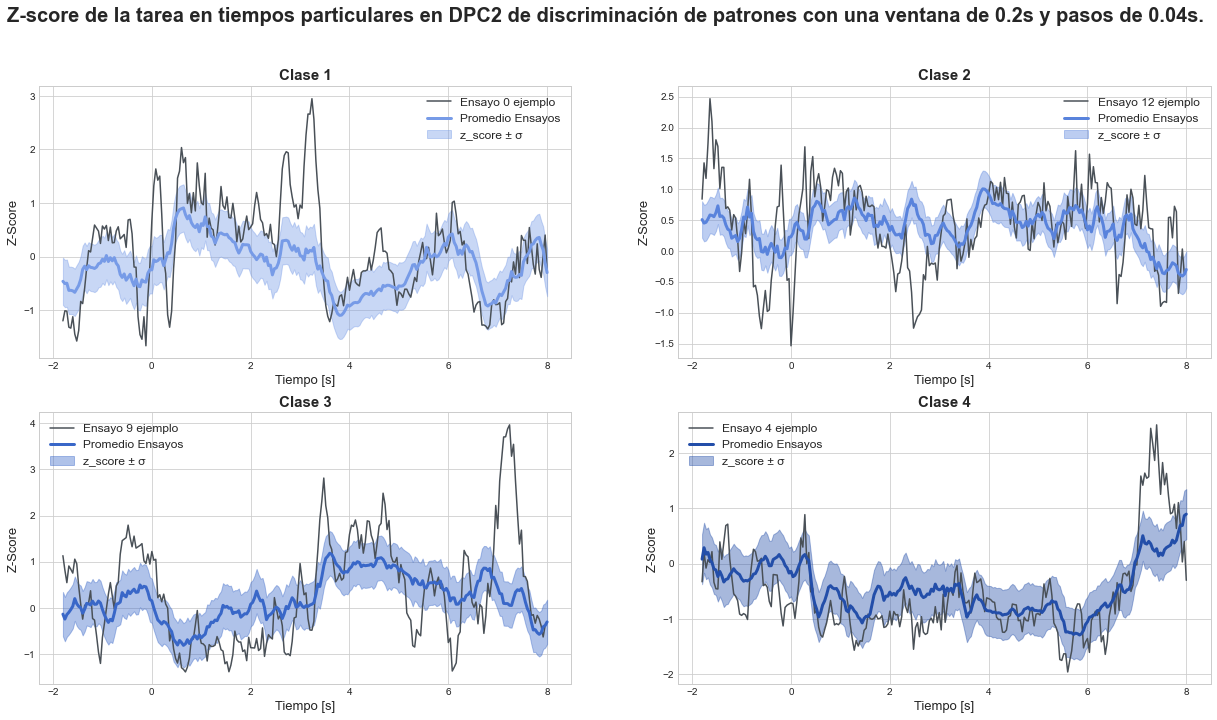

In [37]:
TotalEventos_dpc2 = TotalEventos_dpc2[:,0:246]
#tiempos_dpc = np.arange(-2 + 0.2,8 + 0.04 ,0.04)[:246]
num = 0
neurona = ['tarea en tiempos particulares', 'DPC2']
ejemplo = [0,12,9,4]
colores_zs = ["#779be7","#5983dc","#3967c8","#234ea9"]
nombre_graf = 'z_score_particular_dpc2'
ancho_vent = 0.2
paso_tiempo = 0.04
graficas_zscore_variado(TotalEventos_dpc2,num,ancho_vent,paso_tiempo,neurona,ejemplo,colores_zs,nombre_graf)

In [38]:
vacios,neu_s1 = lectArchivo.lectura_archivo('Practica1_Estadistica/TiemposNeuS1.csv')

In [39]:
bloque1_S1 = np.array(neu_s1[:15])
bloque2_S1 = np.array(neu_s1[15:30])
bloque3_S1 = np.array(neu_s1[30:45])
bloque4_S1 = np.array(neu_s1[45:60])

<ipython-input-39-a6a502ed3558>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque1_S1 = np.array(neu_s1[:15])
<ipython-input-39-a6a502ed3558>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque2_S1 = np.array(neu_s1[15:30])
<ipython-input-39-a6a502ed3558>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque3_S1 = np.array(

In [40]:
tasa_eventos_1_s1, tasa_disparo_1_s1 = tasa_optimizada(-2,8,0.01,0.05,bloque1_S1,ensayos,4)
tasa_eventos_2_s1, tasa_disparo_2_s1 = tasa_optimizada(-2,8,0.01,0.05,bloque2_S1,ensayos,4)
tasa_eventos_3_s1, tasa_disparo_3_s1 = tasa_optimizada(-2,8,0.01,0.05,bloque3_S1,ensayos,4)
tasa_eventos_4_s1, tasa_disparo_4_s1 = tasa_optimizada(-2,8,0.01,0.05,bloque4_S1,ensayos,4)

In [41]:
TotalEventos_s1 = np.vstack([tasa_eventos_1_s1,tasa_eventos_2_s1,tasa_eventos_3_s1,tasa_eventos_4_s1])

In [42]:
eventos = np.std(TotalEventos_s1,axis=0)

In [43]:
len(TotalEventos_s1[0]) - len(eventos[eventos>0])

24

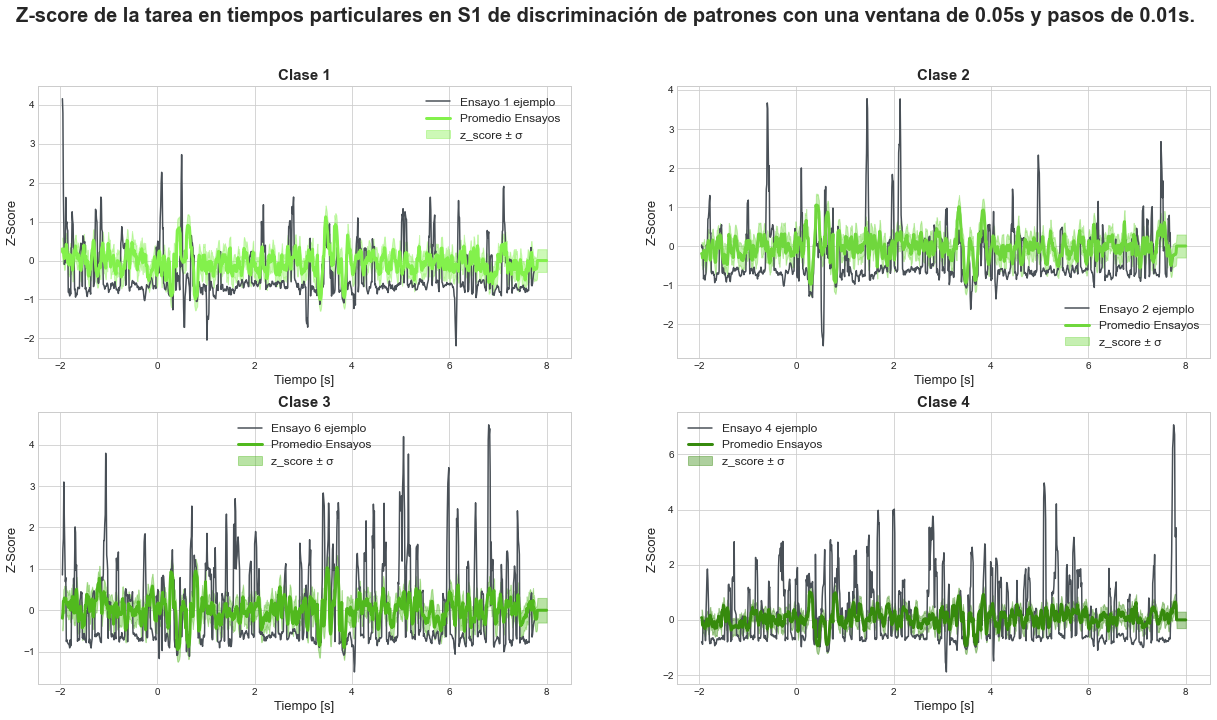

In [44]:
TotalEventos_dpc = TotalEventos_s1[:,0:-24]
#tiempos_s1 =  np.arange(-2 + 0.05,8 + 0.01 ,0.01)[:-24+4]
num = 24-4
neurona = ['tarea en tiempos particulares', 'S1']
ejemplo = [1,2,6,4]
colores_zs = ["#83f14c","#70d73d","#51b91e","#368a0d"]
nombre_graf = 'z_score_particular_s1'
ancho_vent = 0.05
paso_tiempo = 0.01
graficas_zscore_variado(TotalEventos_dpc,num,ancho_vent,paso_tiempo,neurona,ejemplo,colores_zs,nombre_graf)

In [45]:
def graficas_zscore_det_variado(TotalEventos,vacios,ancho_vent,paso_tiempo,neurona,ejemplo,colores_zs,nombre_graf):
        
        indices = indices_reales(vacios)
        
        #TotalEventos_dpc = fun(lista_de_clase,ancho_vent)
        bloque_1 =  TotalEventos[:indices[0]]
        bloque_2 =  TotalEventos[indices[0]:indices[1]]
        bloque_3 =  TotalEventos[indices[1]:indices[2]]
        bloque_4 =  TotalEventos[indices[2]:indices[3]]
        bloque_5 =  TotalEventos[indices[3]:indices[4]]
        bloque_6 =  TotalEventos[indices[4]:]
        
        
        
        mean_data = np.mean(TotalEventos,axis=0) #µ
        std_data  = np.std(TotalEventos,axis=0) #std
        
      
        Z_bloque1 = Z_score(bloque_1,mean_data,std_data)
        Z_bloque2 = Z_score(bloque_2,mean_data,std_data)
        Z_bloque3 = Z_score(bloque_3,mean_data,std_data)
        Z_bloque4 = Z_score(bloque_4,mean_data,std_data)
        Z_bloque5 = Z_score(bloque_5,mean_data,std_data)
        Z_bloque6 = Z_score(bloque_6,mean_data,std_data)
        
    
        ZProm_clase1 = np.mean(Z_bloque1,axis=0) 
        Z_mas_1 = ZProm_clase1 + np.std(ZProm_clase1)
        Z_menos_1 = ZProm_clase1 - np.std(ZProm_clase1)
        
        ZProm_clase2 = np.mean(Z_bloque2,axis=0) 
        Z_mas_2 = ZProm_clase2 + np.std(ZProm_clase2)
        Z_menos_2 = ZProm_clase2 - np.std(ZProm_clase2)
        
        ZProm_clase3 = np.mean(Z_bloque3,axis=0) 
        Z_mas_3 = ZProm_clase3 + np.std(ZProm_clase3)
        Z_menos_3 = ZProm_clase3 - np.std(ZProm_clase3)
        
        ZProm_clase4 = np.mean(Z_bloque4,axis=0) 
        Z_mas_4 = ZProm_clase4 + np.std(ZProm_clase4)
        Z_menos_4 = ZProm_clase4 - np.std(ZProm_clase4)
        
        ZProm_clase5 = np.mean(Z_bloque5,axis=0) 
        Z_mas_5 = ZProm_clase5 + np.std(ZProm_clase5)
        Z_menos_5 = ZProm_clase5 - np.std(ZProm_clase5)
        
        ZProm_clase6 = np.mean(Z_bloque6,axis=0) 
        Z_mas_6 = ZProm_clase6 + np.std(ZProm_clase6)
        Z_menos_6 = ZProm_clase6 - np.std(ZProm_clase6)
        
        fig=plt.figure(figsize=(24,17)) #ancho,largo
        fig.suptitle(f"Z-score de la {neurona[0]} en {neurona[1]} de detección con una ventana de {ancho_vent}s y pasos de {paso_tiempo}s.",fontsize=20,fontweight="bold")
        axs=fig.subplots(3,2)
        tiempos_dpc = np.arange(-2 + ancho_vent,3.5 + paso_tiempo ,paso_tiempo)
        
        axs[0,0].plot(tiempos_dpc,Z_bloque1[ejemplo[0],:],linewidth=1.5,color="#495057",alpha=1)
        axs[0,0].plot(tiempos_dpc,ZProm_clase1,linewidth=3,color=colores_zs[0])
        axs[0,0].fill_between(tiempos_dpc,Z_mas_1,Z_menos_1,color=colores_zs[0],alpha=0.4)
        axs[0,0].set_title("Bloque 1: 0μm",fontsize=15,fontweight="bold")
        axs[0,0].set_xlabel("Tiempo [s]",fontsize=13)
        axs[0,0].set_ylabel("Z-Score",fontsize=13)
        axs[0,0].legend([f'Ensayo {ejemplo[0]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[0,1].plot(tiempos_dpc,Z_bloque2[ejemplo[1],:],linewidth=1.5,color="#495057",alpha=1)
        axs[0,1].plot(tiempos_dpc,ZProm_clase2,linewidth=3,color=colores_zs[1])
        axs[0,1].fill_between(tiempos_dpc,Z_mas_2,Z_menos_2,color=colores_zs[1],alpha=0.4)
        axs[0,1].set_title("Bloque 2: 6μm",fontsize=15,fontweight="bold")
        axs[0,1].set_xlabel("Tiempo [s]",fontsize=13)
        axs[0,1].set_ylabel("Z-Score",fontsize=13)
        axs[0,1].legend([f'Ensayo {ejemplo[1]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[1,0].plot(tiempos_dpc,Z_bloque3[ejemplo[2],:],linewidth=1.5,color="#495057",alpha=1)
        axs[1,0].plot(tiempos_dpc,ZProm_clase3,linewidth=3,color=colores_zs[2])
        axs[1,0].fill_between(tiempos_dpc,Z_mas_3,Z_menos_3,color=colores_zs[2],alpha=0.4)
        axs[1,0].set_title("Bloque 3: 8μm",fontsize=15,fontweight="bold")
        axs[1,0].set_xlabel("Tiempo [s]",fontsize=13)
        axs[1,0].set_ylabel("Z-Score",fontsize=13)
        axs[1,0].legend([f'Ensayo {ejemplo[2]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[1,1].plot(tiempos_dpc,Z_bloque4[ejemplo[3],:],linewidth=1.5,color="#495057",alpha=1)
        axs[1,1].plot(tiempos_dpc,ZProm_clase4,linewidth=3,color=colores_zs[3])
        axs[1,1].fill_between(tiempos_dpc,Z_mas_4,Z_menos_4,color=colores_zs[3],alpha=0.4)
        axs[1,1].set_title("Bloque 4: 10μm",fontsize=15,fontweight="bold")
        axs[1,1].set_xlabel("Tiempo [s]",fontsize=13)
        axs[1,1].set_ylabel("Z-Score",fontsize=13)
        axs[1,1].legend([f'Ensayo {ejemplo[3]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[2,0].plot(tiempos_dpc,Z_bloque5[ejemplo[4],:],linewidth=1.5,color="#495057",alpha=1)
        axs[2,0].plot(tiempos_dpc,ZProm_clase5,linewidth=3,color=colores_zs[4])
        axs[2,0].fill_between(tiempos_dpc,Z_mas_5,Z_menos_5,color=colores_zs[4],alpha=0.4)
        axs[2,0].set_title("Bloque 5: 12μm",fontsize=15,fontweight="bold")
        axs[2,0].set_xlabel("Tiempo [s]",fontsize=13)
        axs[2,0].set_ylabel("Z-Score",fontsize=13)
        axs[2,0].legend([f'Ensayo {ejemplo[4]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        axs[2,1].plot(tiempos_dpc,Z_bloque6[ejemplo[5],:],linewidth=1.5,color="#495057",alpha=1)
        axs[2,1].plot(tiempos_dpc,ZProm_clase6,linewidth=3,color=colores_zs[5])
        axs[2,1].fill_between(tiempos_dpc,Z_mas_6,Z_menos_6,color=colores_zs[5],alpha=0.4)
        axs[2,1].set_title("Bloque 6: 24μm",fontsize=15,fontweight="bold")
        axs[2,1].set_xlabel("Tiempo [s]",fontsize=13)
        axs[2,1].set_ylabel("Z-Score",fontsize=13)
        axs[2,1].legend([f'Ensayo {ejemplo[0]} ejemplo','Promedio Ensayos','z_score ± σ'],fontsize=12)
        
        plt.savefig(nombre_graf)
        plt.show()

In [46]:
vacios,neu_s1B = lectArchivo.lectura_archivo('Practica2_Estadistica/Neu_Det_S1B.csv')

In [47]:
indices = indices_reales(vacios)

In [48]:
bloq_1 = len(neu_s1B[:indices[0]])
bloq_2 = len(neu_s1B[indices[0]:indices[1]])
bloq_3 = len(neu_s1B[indices[1]:indices[2]])
bloq_4 = len(neu_s1B[indices[2]:indices[3]])
bloq_5 = len(neu_s1B[indices[3]:indices[4]])
bloq_6 = len(neu_s1B[indices[4]:])

In [49]:
ensayos = bloq_1
bloque1_s1B = neu_s1B[:indices[0]]

In [50]:
bloque1_s1B = np.array(bloque1_s1B)
bloque1_s1B = [ bloque1_s1B[i][(bloque1_s1B[i]>=-2) & (bloque1_s1B[i]<=3.5)] for i in range(len(bloque1_s1B))]

<ipython-input-50-eac79507374a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque1_s1B = np.array(bloque1_s1B)


In [51]:
tasa_eventos_1_s1B, tasa_disparo_1_s1B = tasa_optimizada(-2,3.5,0.01,0.05,bloque1_s1B,ensayos,4)

<ipython-input-15-ace73035d3f0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  P =(bloque + np.abs(inicio))//paso


In [52]:
ensayos = bloq_2
bloque2_s1B = neu_s1B[indices[0]:indices[1]]

In [53]:
bloque2_s1B = np.array(bloque2_s1B)
bloque2_s1B = [ bloque2_s1B[i][(bloque2_s1B[i]>=-2) & (bloque2_s1B[i]<=3.5)] for i in range(len(bloque2_s1B))]

<ipython-input-53-bd90b04aa50b>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque2_s1B = np.array(bloque2_s1B)


In [54]:
tasa_eventos_2_s1B, tasa_disparo_2_s1B = tasa_optimizada(-2,3.5,0.01,0.05,bloque2_s1B,ensayos,4)

<ipython-input-15-ace73035d3f0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  P =(bloque + np.abs(inicio))//paso


In [55]:
ensayos = bloq_3
bloque3_s1B = neu_s1B[indices[1]:indices[2]]
bloque3_s1B = np.array(bloque3_s1B)
bloque3_s1B = [ bloque3_s1B[i][(bloque3_s1B[i]>=-2) & (bloque3_s1B[i]<=3.5)] for i in range(len(bloque3_s1B))]

<ipython-input-55-50408dfe6159>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque3_s1B = np.array(bloque3_s1B)


In [56]:
tasa_eventos_3_s1B, tasa_disparo_3_s1B = tasa_optimizada(-2,3.5,0.01,0.05,bloque3_s1B,ensayos,4)

<ipython-input-15-ace73035d3f0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  P =(bloque + np.abs(inicio))//paso


In [57]:
ensayos = bloq_4
bloque4_s1B = neu_s1B[indices[2]:indices[3]]
bloque4_s1B = np.array(bloque4_s1B)
bloque4_s1B = [ bloque4_s1B[i][(bloque4_s1B[i]>=-2) & (bloque4_s1B[i]<=3.5)] for i in range(len(bloque4_s1B))]

<ipython-input-57-32f1f920b286>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque4_s1B = np.array(bloque4_s1B)


In [58]:
tasa_eventos_4_s1B, tasa_disparo_4_s1B = tasa_optimizada(-2,3.5,0.01,0.05,bloque4_s1B,ensayos,4)

<ipython-input-15-ace73035d3f0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  P =(bloque + np.abs(inicio))//paso


In [59]:
ensayos = bloq_5
bloque5_s1B = neu_s1B[indices[3]:indices[4]]
bloque5_s1B = np.array(bloque5_s1B)
bloque5_s1B = [ bloque5_s1B[i][(bloque5_s1B[i]>=-2) & (bloque5_s1B[i]<=3.5)] for i in range(len(bloque5_s1B))]

<ipython-input-59-6d04dded71c3>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque5_s1B = np.array(bloque5_s1B)


In [60]:
tasa_eventos_5_s1B, tasa_disparo_5_s1B = tasa_optimizada(-2,3.5,0.01,0.05,bloque5_s1B,ensayos,4)

<ipython-input-15-ace73035d3f0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  P =(bloque + np.abs(inicio))//paso


In [61]:
ensayos = bloq_6
bloque6_s1B = neu_s1B[indices[4]:]
bloque6_s1B = np.array(bloque6_s1B)
bloque6_s1B = [ bloque6_s1B[i][(bloque6_s1B[i]>=-2) & (bloque6_s1B[i]<=3.5)] for i in range(len(bloque6_s1B))]

<ipython-input-61-ddb1e36d2582>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque6_s1B = np.array(bloque6_s1B)


In [62]:
tasa_eventos_6_s1B, tasa_disparo_6_s1B = tasa_optimizada(-2,3.5,0.01,0.05,bloque6_s1B,ensayos,4)

<ipython-input-15-ace73035d3f0>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  P =(bloque + np.abs(inicio))//paso


In [63]:
vacios,neu_s1B = lectArchivo.lectura_archivo('Practica2_Estadistica/Neu_Det_S1B.csv')

In [64]:
TotalEventos_s1B = np.vstack([tasa_eventos_1_s1B,tasa_eventos_2_s1B,tasa_eventos_3_s1B,tasa_eventos_4_s1B,tasa_eventos_5_s1B,tasa_eventos_6_s1B])

In [65]:
TotalEventos_s1B = TotalEventos_s1B[:,0:546]
#tiempos_s1 =  np.arange(-2 + 0.05,8 + 0.01 ,0.01)[:-24+4]
#num = 24-4
neurona = ['tarea en tiempos particulares', 'S1B']
ejemplo = [1,4,5,8,0,4]
colores_zs = ["#59f67d","#3ee063","#2ccd50","#16b639","#0f9d2e","#068723"]
nombre_graf = 'z_score_particular_s1B'
ancho_vent = 0.05
paso_tiempo = 0.01

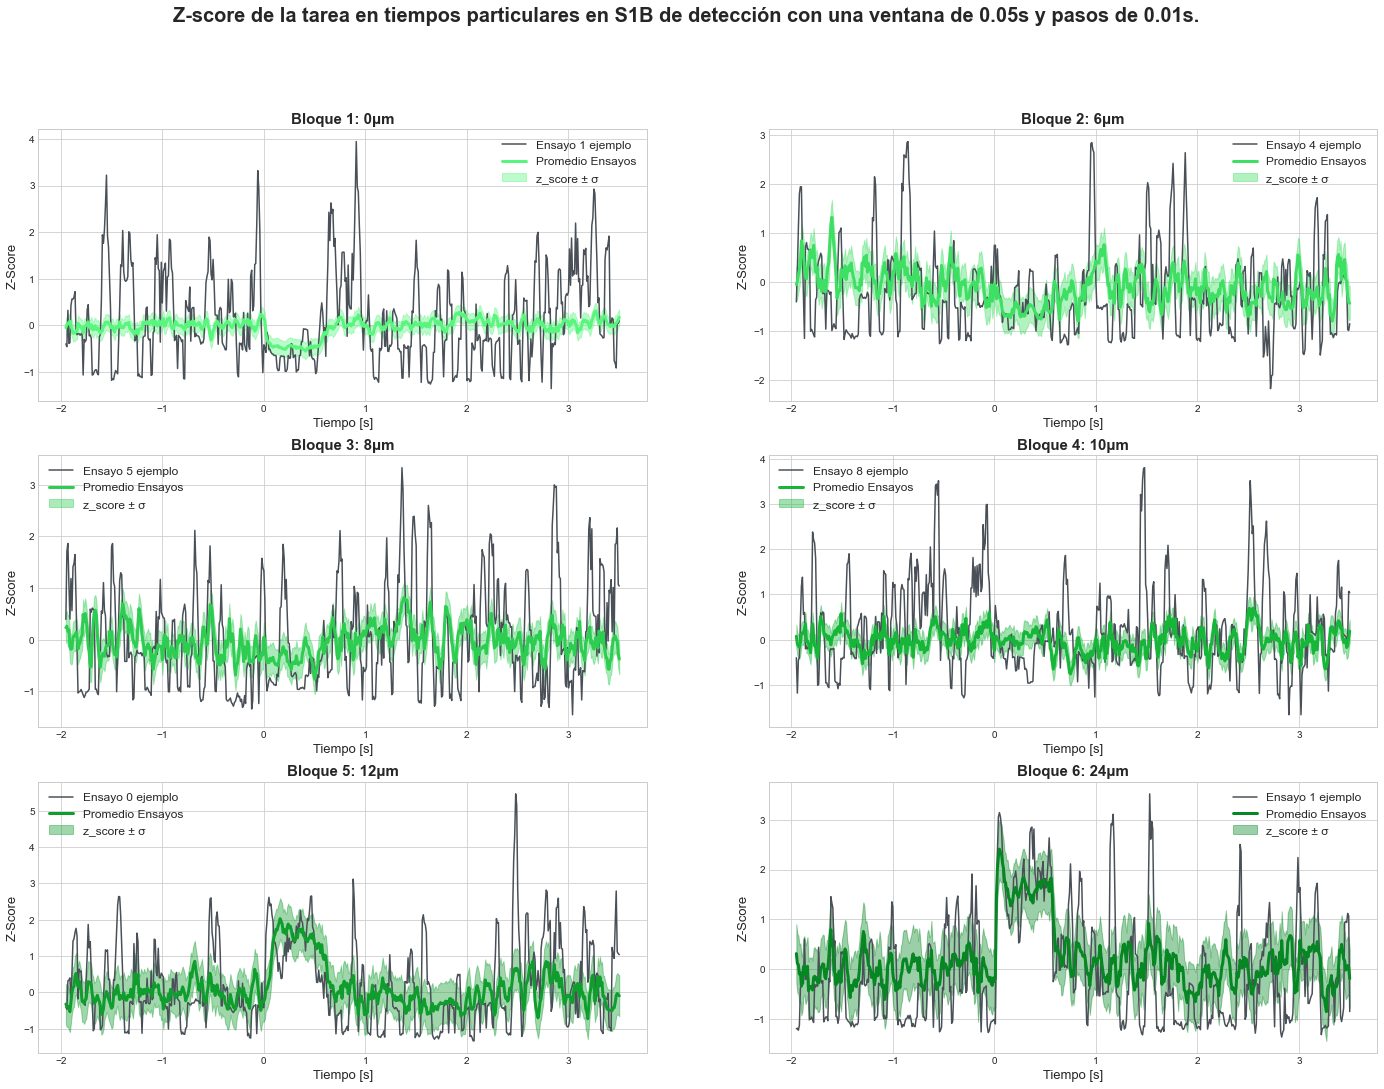

In [66]:
graficas_zscore_det_variado(TotalEventos_s1B,vacios,ancho_vent,paso_tiempo,neurona,ejemplo,colores_zs,nombre_graf)

In [67]:
def bloques_tasa_det(vacios,neu_det,paso,vent):
    
    indices = indices_reales(vacios)
    
    bloq_1 = neu_det[:indices[0]]
    bloq_2 = neu_det[indices[0]:indices[1]]
    bloq_3 = neu_det[indices[1]:indices[2]]
    bloq_4 = neu_det[indices[2]:indices[3]]
    bloq_5 = neu_det[indices[3]:indices[4]]
    bloq_6 = neu_det[indices[4]:]
    
    bloque1_det = np.array(bloq_1)
    bloque2_det = np.array(bloq_2)
    bloque3_det = np.array(bloq_3)
    bloque4_det = np.array(bloq_4)
    bloque5_det = np.array(bloq_5)
    bloque6_det = np.array(bloq_6)
    
    bloque1_det = [ bloque1_det[i][(bloque1_det[i]>=-2) & (bloque1_det[i]<=3.5)] for i in range(len(bloque1_det))]
    bloque2_det = [ bloque2_det[i][(bloque2_det[i]>=-2) & (bloque2_det[i]<=3.5)] for i in range(len(bloque2_det))]
    bloque3_det = [ bloque3_det[i][(bloque3_det[i]>=-2) & (bloque3_det[i]<=3.5)] for i in range(len(bloque3_det))]
    bloque4_det = [ bloque4_det[i][(bloque4_det[i]>=-2) & (bloque4_det[i]<=3.5)] for i in range(len(bloque4_det))]
    bloque5_det = [ bloque5_det[i][(bloque5_det[i]>=-2) & (bloque5_det[i]<=3.5)] for i in range(len(bloque5_det))]
    bloque6_det = [ bloque6_det[i][(bloque6_det[i]>=-2) & (bloque6_det[i]<=3.5)] for i in range(len(bloque6_det))]
    
    tasa_eventos_1, tasa_disparo_1 = tasa_optimizada(-2,3.5,paso,vent,bloque1_det,len(bloq_1),4)
    tasa_eventos_2, tasa_disparo_2 = tasa_optimizada(-2,3.5,paso,vent,bloque2_det,len(bloq_2),4)
    tasa_eventos_3, tasa_disparo_3 = tasa_optimizada(-2,3.5,paso,vent,bloque3_det,len(bloq_3),4)
    tasa_eventos_4, tasa_disparo_4 = tasa_optimizada(-2,3.5,paso,vent,bloque4_det,len(bloq_4),4)
    tasa_eventos_5, tasa_disparo_5 = tasa_optimizada(-2,3.5,paso,vent,bloque5_det,len(bloq_5),4)
    tasa_eventos_6, tasa_disparo_6 = tasa_optimizada(-2,3.5,paso,vent,bloque6_det,len(bloq_6),4)
    
    TotalEventos = np.vstack([tasa_eventos_1,tasa_eventos_2,tasa_eventos_3,tasa_eventos_4,tasa_eventos_5,tasa_eventos_6])
    
    return TotalEventos
    

In [68]:
vacios,neu_s1D = lectArchivo.lectura_archivo('Practica2_Estadistica/Neu_Det_S1D.csv')

In [69]:
TotalEventos_s1D = bloques_tasa_det(vacios,neu_s1D,0.01,0.05)

<ipython-input-67-bffbbf5d308a>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque1_det = np.array(bloq_1)
<ipython-input-67-bffbbf5d308a>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque2_det = np.array(bloq_2)
<ipython-input-67-bffbbf5d308a>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bloque3_det = np.array(bloq_3

In [70]:
TotalEventos_s1D = TotalEventos_s1D[:,0:546]
#tiempos_s1 =  np.arange(-2 + 0.05,8 + 0.01 ,0.01)[:-24+4]
#num = 24-4
neurona = ['tarea en tiempos particulares', 'S1D']
ejemplo = [1,4,5,5,0,4]
colores_zs = ["#f88c02","#ec8c12","#d57e10","#b96e10","#a5610a","#7b4806"]
nombre_graf = 'z_score_particular_s1D'
ancho_vent = 0.05
paso_tiempo = 0.01

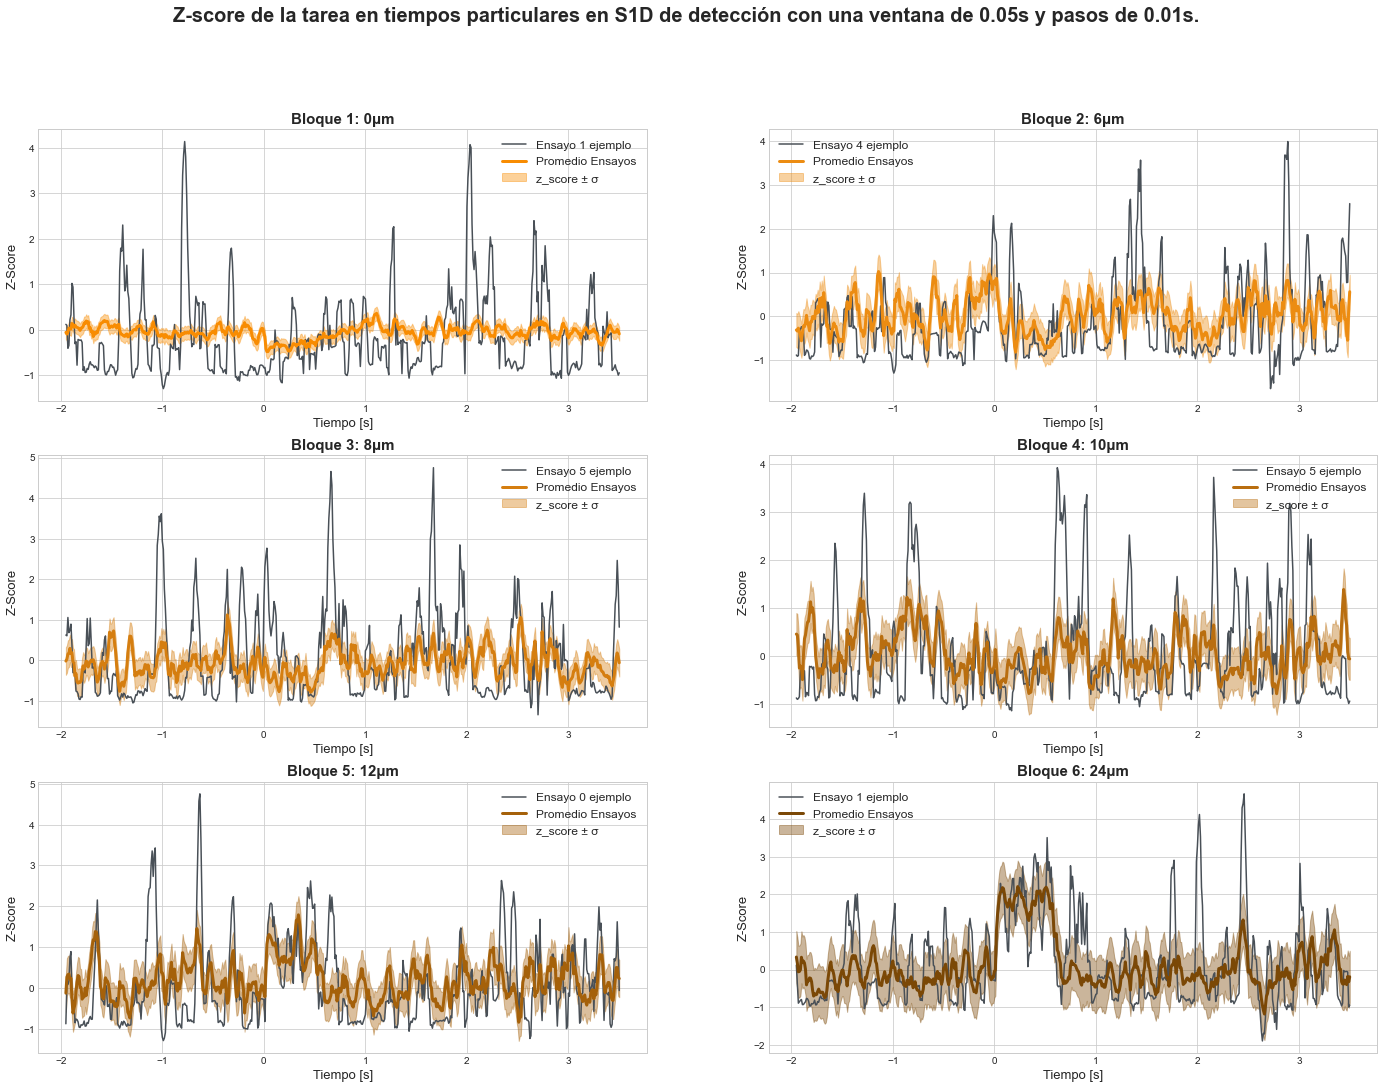

In [71]:
graficas_zscore_det_variado(TotalEventos_s1D,vacios,ancho_vent,paso_tiempo,neurona,ejemplo,colores_zs,nombre_graf)

(d) Obten y gráfica el z-score (para cada neurona y clase) usando la tasa de cada
ventana particular y los ensayos correspondientes a cada clase para calcular el valor
medio y la desviación estándar con las que se computa la transformada z en cada
tiempo y clase. Para este inciso, además grafique la tasa transformada de algunos
ensayos de cada una de las clases como ejemplos.


(e) Discuta: ¿qué diferencias observa entre los distintos cálculos realizados?